### Importação dos dados e bibliotecas



In [2]:
# Importando as bibliotecas que vamos usar nesse projeto

# Bibliotecas principais para analisar esses dados ( tabela, matriz e visualização)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importada para tratar as datas
from datetime import datetime

# Importada para Tratar a saida dos dados de forma mais organizada
from IPython.display import display,HTML, Markdown
# Importada para tratar alguns formatos nas saidas dos graficos
from matplotlib.ticker import ScalarFormatter,FuncFormatter

# Biblioteca para realizar a previsão temporal
from prophet import Prophet

# Importada para gerar o mapa
import folium
from folium.plugins import HeatMap

# Links dos dodos disponiveis para analise
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

# Salvando os dados em um espaço da mémoria (variavel)
loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# Criando uma lista com as lojas para facilitar o manuseio
lojas = [loja, loja2, loja3, loja4]

### Manipulando e editando os dados

In [3]:
# convertendo a coluna data para datetime e criando as colunas mês e ano
for i in lojas:
  i['Data da Compra'] = pd.to_datetime(i['Data da Compra'], format='%d/%m/%Y')
  i['Mês'], i['Ano'] = i['Data da Compra'].dt.month, i['Data da Compra'].dt.year

# Editando a coluna ['Frete'] para ser arredondada para duas casas decimais
for i in lojas:
  i['Frete'] = i['Frete'].apply(lambda x: round(x,2))

# Criando uma função para formatar os numeros para o padrão Brasileiro
def formata_numero(numero):
  return f" R$ {numero:,.2f}".replace(',','X').replace('.',',').replace('X','.')

In [4]:
# Verificando os tipo das colunas
for i in lojas:
  print(i.dtypes)

Produto                           object
Categoria do Produto              object
Preço                            float64
Frete                            float64
Data da Compra            datetime64[ns]
Vendedor                          object
Local da compra                   object
Avaliação da compra                int64
Tipo de pagamento                 object
Quantidade de parcelas             int64
lat                              float64
lon                              float64
Mês                                int32
Ano                                int32
dtype: object
Produto                           object
Categoria do Produto              object
Preço                            float64
Frete                            float64
Data da Compra            datetime64[ns]
Vendedor                          object
Local da compra                   object
Avaliação da compra                int64
Tipo de pagamento                 object
Quantidade de parcelas             int64
la

In [5]:
# Verificando se tem algum valor faltante
for i in lojas:
  print(i.isna().sum())

Produto                   0
Categoria do Produto      0
Preço                     0
Frete                     0
Data da Compra            0
Vendedor                  0
Local da compra           0
Avaliação da compra       0
Tipo de pagamento         0
Quantidade de parcelas    0
lat                       0
lon                       0
Mês                       0
Ano                       0
dtype: int64
Produto                   0
Categoria do Produto      0
Preço                     0
Frete                     0
Data da Compra            0
Vendedor                  0
Local da compra           0
Avaliação da compra       0
Tipo de pagamento         0
Quantidade de parcelas    0
lat                       0
lon                       0
Mês                       0
Ano                       0
dtype: int64
Produto                   0
Categoria do Produto      0
Preço                     0
Frete                     0
Data da Compra            0
Vendedor                  0
Local da compra       

In [6]:
# verificando os dados, para entender os valores unicos em cada coluna
for i in lojas:
  print(f'\n{i.nunique()}')


Produto                     51
Categoria do Produto         8
Preço                     2315
Frete                     1803
Data da Compra            1018
Vendedor                    14
Local da compra             26
Avaliação da compra          5
Tipo de pagamento            4
Quantidade de parcelas      15
lat                         26
lon                         26
Mês                         12
Ano                          4
dtype: int64

Produto                     51
Categoria do Produto         8
Preço                     2320
Frete                     1759
Data da Compra            1025
Vendedor                    14
Local da compra             26
Avaliação da compra          5
Tipo de pagamento            4
Quantidade de parcelas      17
lat                         26
lon                         26
Mês                         12
Ano                          4
dtype: int64

Produto                     51
Categoria do Produto         8
Preço                     2336
Frete     

#1. Análise do faturamento


In [7]:
display(HTML(f"<p style=font-size:24px;> Relatório de Faturamento Total de cada Loja</p>")) # Editando o titulo com base em HTML
for id,i in enumerate(lojas): # Para cada loja, trás indice da loja e a loja.
  print(f"Faturamento  Total da Loja {id+1}: {formata_numero(i['Preço'].sum())}") # imprima a soma da coluna Preço de cada loja.

Faturamento  Total da Loja 1:  R$ 1.534.509,12
Faturamento  Total da Loja 2:  R$ 1.488.459,06
Faturamento  Total da Loja 3:  R$ 1.464.025,03
Faturamento  Total da Loja 4:  R$ 1.384.497,58


In [8]:
display(HTML(f"<p style=font-size:24px;> Relatório de Faturamento anual</p>"))
html = ""
for id,i in enumerate(lojas):
  html += f"<div style='display:inline-block; margin: 10px; vertical-align:top'>"
  html+= f"<h4>Faturamentos Anuais da Loja {id+1}</h4>"
  for ano,faturamento in i.groupby('Ano')['Preço'].sum().items():
    html +=  f'Ano: {ano} | Faturamento: {formata_numero(faturamento)}<br>'
  html += "</div>"
display(HTML(html))

In [9]:
display(HTML(f"<p style=font-size:24px;> Relatório de Faturamento médio mensal</p>"))
for idx,i in enumerate(lojas,start=1):
  print(f'\n\t\t\tLoja {idx}')
  for ano in sorted(i['Ano'].unique()):
    soma = i[i['Ano']== ano].groupby('Ano')['Preço'].sum()
    meses = len(i[i['Ano']== ano]['Mês'].unique())
    media = soma / meses

    print(f'Ano: {ano} | Média vendas Mensal: {formata_numero(media.iloc[0])}')


			Loja 1
Ano: 2020 | Média vendas Mensal:  R$ 40.992,63
Ano: 2021 | Média vendas Mensal:  R$ 40.235,83
Ano: 2022 | Média vendas Mensal:  R$ 35.173,85
Ano: 2023 | Média vendas Mensal:  R$ 45.893,82

			Loja 2
Ano: 2020 | Média vendas Mensal:  R$ 35.607,35
Ano: 2021 | Média vendas Mensal:  R$ 39.024,07
Ano: 2022 | Média vendas Mensal:  R$ 39.802,96
Ano: 2023 | Média vendas Mensal:  R$ 38.415,45

			Loja 3
Ano: 2020 | Média vendas Mensal:  R$ 35.745,26
Ano: 2021 | Média vendas Mensal:  R$ 40.328,24
Ano: 2022 | Média vendas Mensal:  R$ 38.937,56
Ano: 2023 | Média vendas Mensal:  R$ 27.964,11

			Loja 4
Ano: 2020 | Média vendas Mensal:  R$ 36.760,79
Ano: 2021 | Média vendas Mensal:  R$ 38.646,94
Ano: 2022 | Média vendas Mensal:  R$ 33.580,10
Ano: 2023 | Média vendas Mensal:  R$ 25.547,85


# 2. Vendas por Categoria


In [10]:
display(HTML(f"<p style=font-size:24px;> Relatório de Vendas por Categoria</p>"))
html = "" # Criando uma variavel vazia para receber os dados e salvar na div
for id,i in enumerate(lojas,start=1): # index a partir de 1, pois a indexação começa com zero.
  html += f"<div style='display:inline-block; margin:10px; vertical-align:top'>" # primeiro abre a div e edita seu estilo, alinhando pelo topo, e salvando todos os relatorios em linha na horizontal
  html += f"<h4>Relatório Loja {id}</h4>" # O titulo dos relatórios de cada loja.
  # adicionando dentro da div a contagem de vendas, de cada loja, resetando o indice dos nomes e colunas, e retira o index da esqueda.
  html += i['Categoria do Produto'].value_counts().to_frame().reset_index(names=['Categorias']).rename(columns={'count': 'Quantidade'}).to_html(index=False)
  html += "</div>" # fecha a div
display(HTML(html)) # imprime o html, usando o parametro display e o metodo HTML;

Categorias,Quantidade
moveis,465
eletronicos,448
brinquedos,324
eletrodomesticos,312
esporte e lazer,284
instrumentos musicais,182
livros,173
utilidades domesticas,171
Categorias,Quantidade
moveis,442


# 3. Média de Avaliação das Lojas

In [11]:
display(HTML(f"<p style=font-size:24px;> Relatório de Avaliação das lojas</p>"))
for id,i in enumerate(lojas):
  media_avaliacao_loja = np.mean(i['Avaliação da compra']) # pegando a média da avaliações das compras de cada loja e salvando em uma variavel
  print(f'Média de Avaliações da Loja {id+1}: {round(media_avaliacao_loja,2)}') # imprimindo a variavel, tratando o numero e arredondando com duas casas decimais

Média de Avaliações da Loja 1: 3.98
Média de Avaliações da Loja 2: 4.04
Média de Avaliações da Loja 3: 4.05
Média de Avaliações da Loja 4: 4.0


# 4. Produtos Mais e Menos Vendidos

In [12]:
display(HTML(f"<p style=font-size:24px;> Relatório de podutos mais e menos vendidos</p>"))
for id,i in enumerate(lojas,start=1):
# gerando relatorio dos produtos mais e menos vendidos
  print(f'Loja {id} | Produto mais Vendido: {i["Produto"].value_counts().index[0]} com {i["Produto"].value_counts().values[0]} vendidos')
  print(f'       | Produto menos Vendido: {i["Produto"].value_counts().index[-1]}com {i["Produto"].value_counts().values[-1]} vendidos\n')

Loja 1 | Produto mais Vendido: Micro-ondas com 60 vendidos
       | Produto menos Vendido: Celular ABXYcom 33 vendidos

Loja 2 | Produto mais Vendido: Iniciando em programação com 65 vendidos
       | Produto menos Vendido: Jogo de tabuleirocom 32 vendidos

Loja 3 | Produto mais Vendido: Kit banquetas com 57 vendidos
       | Produto menos Vendido: Blocos de montarcom 35 vendidos

Loja 4 | Produto mais Vendido: Cama box com 62 vendidos
       | Produto menos Vendido: Guitarracom 33 vendidos



# 5. Frete Médio por Loja


In [13]:
display(HTML(f"<p style=font-size:24px;> Relatório de Média e Total de custos com frete</p>"))
for id,i in enumerate(lojas):
  # gerando um relatório de Custo médio dos fretes e de Custo total dos fretes para todas s lojas.
  print(f'Loja {id+1} | Custo médio: {formata_numero(i["Frete"].mean())}')
  print(f'       | Total custo: {formata_numero(i["Frete"].sum())}\n')

Loja 1 | Custo médio:  R$ 34,69
       | Total custo:  R$ 81.837,87

Loja 2 | Custo médio:  R$ 33,62
       | Total custo:  R$ 79.314,23

Loja 3 | Custo médio:  R$ 33,07
       | Total custo:  R$ 78.022,49

Loja 4 | Custo médio:  R$ 31,28
       | Total custo:  R$ 73.755,98



# 6. Gráficos

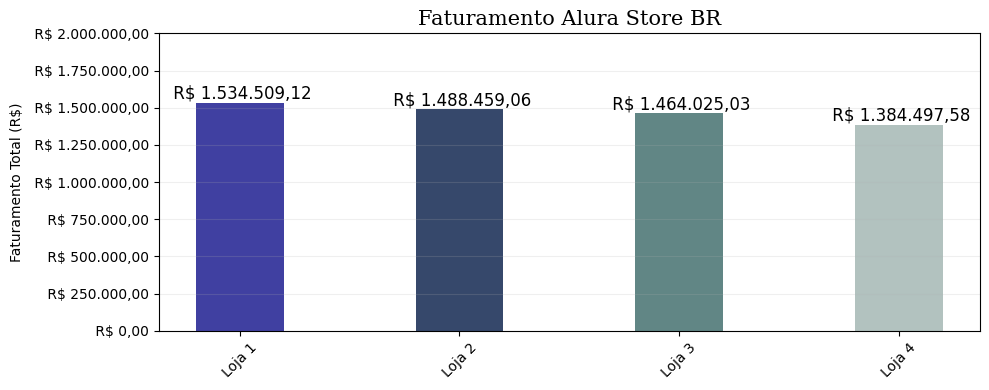

<Figure size 640x480 with 0 Axes>

In [14]:
# Preparar os dados
def calcular_faturamento(lojas): # criando uma função para pegar os dados para alimentar o grafico
    nomes = [f'Loja {i+1}' for i in range(len(lojas))] # Pegando os nomes das lojas
    valores = [loja['Preço'].sum() for loja in lojas]# pegando o faturamento todal de cada loja
    rotulos = [formata_numero(v) for v in valores] # formatando os rotulos com os valores de moedas brasileiras
    return nomes, valores, rotulos # retornndo a função

# Criar gráfico
def grafico_faturamento(nomes, valores, rotulos):
    cores = ['#4040a1', '#36486b', '#618685', '#b2c2bf'] # cores que escolhi para representar os graficos

    plt.figure(figsize=(10, 4)) # Tamanho do grafico
    barras = plt.bar(nomes, valores, color=cores, width=0.4) #  Dados para o grafico
# Editando o gráfico
    plt.ylabel('Faturamento Total (R$)')
    plt.title('Faturamento Alura Store BR', loc='center', size=15, family='serif')
    plt.xticks(rotation=45)
    plt.ylim(0, 2000000)
    plt.grid(axis='y',alpha=0.2) # grade apenas no eixo y, com 80% de transparência

    # Remove notação científica e aplica formato brasileiro no eixo Y
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda v, _: formata_numero(v)))

    # Rótulos nas barras
    plt.bar_label(barras, labels=rotulos, fontsize=12)

    plt.tight_layout() #ajusta o grafico da melhor forma
    plt.show()


# Executar tudo
nomes_lojas, faturamentos, rotulos = calcular_faturamento(lojas)
grafico_faturamento(nomes_lojas, faturamentos, rotulos)


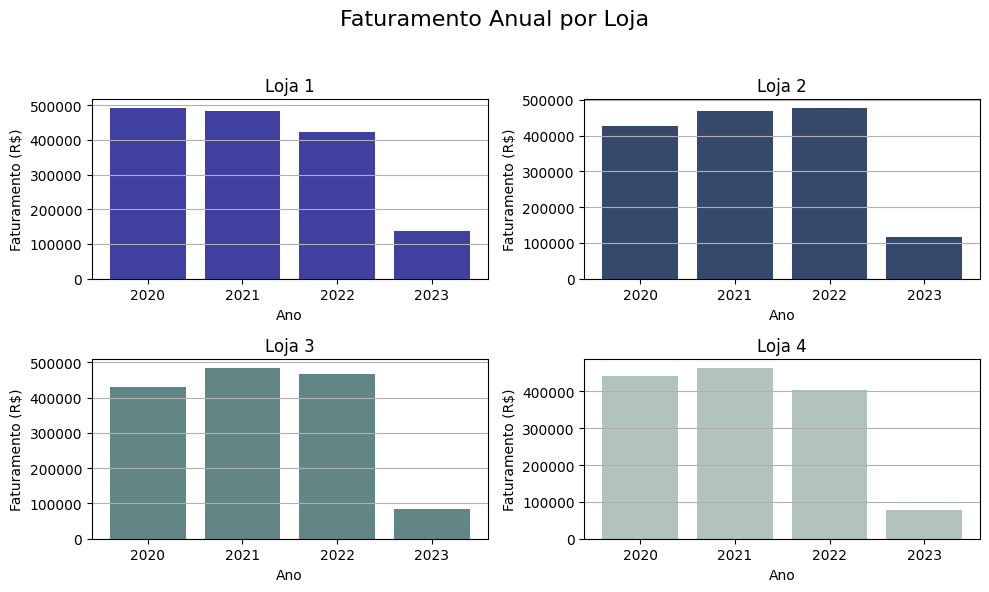

In [22]:
fig, axs = plt.subplots(2, 2, figsize=(10, 6)) # configuração com 4 graficos
fig.suptitle('Faturamento Anual por Loja', fontsize=16) # Titulo principal
cores = ['#4040a1', '#36486b', '#618685', '#b2c2bf']

for idx, loja in enumerate(lojas):# Retorna os indices e os dados de cada loja
    ax = axs[idx // 2][idx % 2] # calculo para determinar onde cada grafico entra

    # Agrupar por mês e somar o faturamento
    faturamento_anual = loja.groupby('Ano')['Preço'].sum().sort_index()

    # Gráfico de barras
    ax.bar(faturamento_anual.index, faturamento_anual.values, color=cores[idx])
    # Editando o Grafico
    ax.set_title(f'Loja {idx + 1}')
    ax.set_xlabel('Ano')
    ax.set_ylabel('Faturamento (R$)')
    ax.set_xticks(faturamento_anual.index)
    ax.grid(axis='y')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa5hzponu/zpz1_mu2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa5hzponu/ilqnrrfx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56073', 'data', 'file=/tmp/tmpa5hzponu/zpz1_mu2.json', 'init=/tmp/tmpa5hzponu/ilqnrrfx.json', 'output', 'file=/tmp/tmpa5hzponu/prophet_modeloa87aggg/prophet_model-20250606010556.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:05:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:05:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


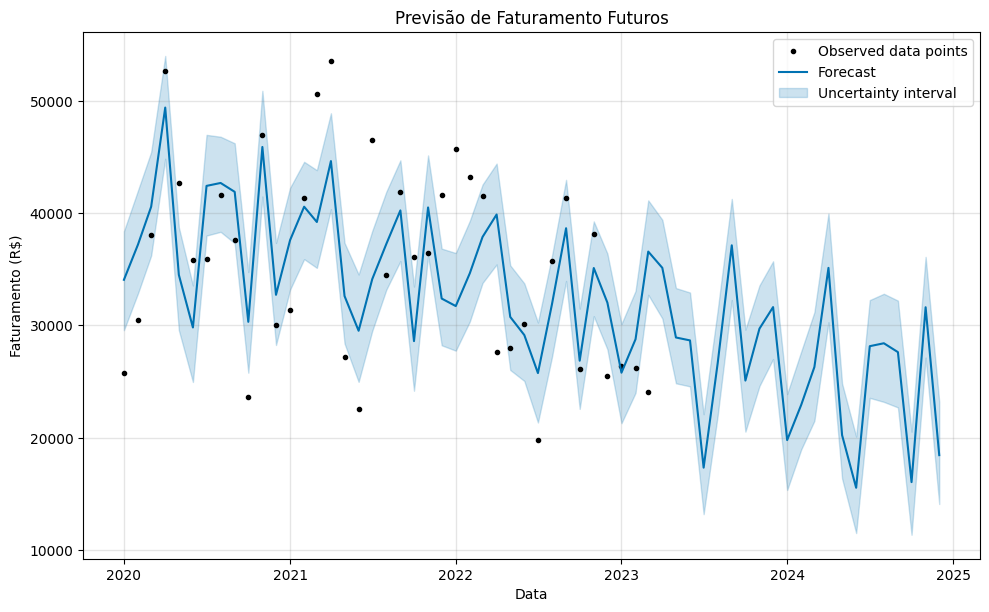

In [16]:
# Preparar dados para o Prophet
df = loja4.copy()# copiando apenas o dataset da loja 4
df['Data'] = pd.to_datetime(df[['Ano', 'Mês']].rename(columns={'Ano': 'year', 'Mês': 'month'}).assign(day=1)) # renomeando para os nomes em inglês para possibilitar a leitura do Prophet
faturamento = df.groupby('Data')['Preço'].sum().reset_index() # Agrupando o faturamento pelas coluna data
faturamento.columns = ['ds', 'y']  # Prophet exige essas colunas

#  Criar e ajustar o modelo
modelo = Prophet(interval_width=0.50)
modelo.fit(faturamento)

# Criar datas futuras até dezembro de 2024
future = modelo.make_future_dataframe(periods=21, freq='MS')  # 21 meses após março/2023

# Fazer previsão
forecast = modelo.predict(future)

#  Plotar resultado
fig = modelo.plot(forecast)

plt.title('Previsão de Faturamento Futuros')
plt.xlabel('Data')
plt.legend()
plt.ylabel('Faturamento (R$)')
plt.grid(True)
plt.show()

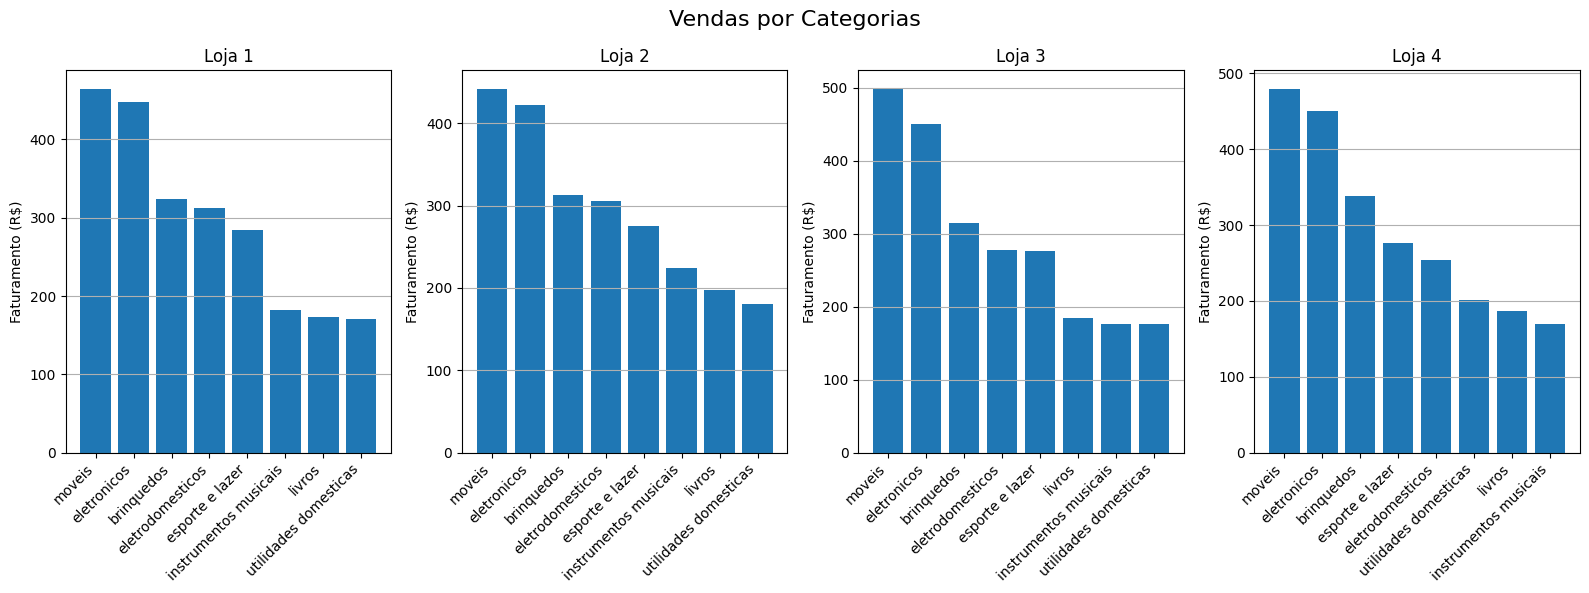

In [17]:
fig, axs = plt.subplots(1, 4, figsize=(16, 6)) # Figura do grafico  e eixos
fig.suptitle('Vendas por Categorias', fontsize=16) # Titulo
cores = ['#4040a1', '#36486b', '#618685', '#b2c2bf']

for idx, loja in enumerate(lojas):
    ax = axs[idx]# indexação de eixos

    # Soma a quantidade de vendas por categoria
    categorias = loja['Categoria do Produto'].value_counts()

    # Gráfico de barras
    ax.bar(categorias.index, categorias.values)

    ax.set_title(f'Loja {idx + 1}')
    ax.set_ylabel('Faturamento (R$)')
    ax.set_xticks(categorias.index, labels=categorias.index, rotation=45, ha='right')
    ax.grid(axis='y')

plt.tight_layout()
plt.show()

In [25]:
# Criar os mapas de calor por loja
mapas = []
for loja in lojas: # criar uma mapa para cada uma das lojas usando as colunas 'lat' e 'lon'.
    mapa = folium.Map(location=[loja['lat'].mean(), loja['lon'].mean()], zoom_star=0) #Salve em uma variavel, a media de coluna lat e lon de cada loja, começãndo com zoom 0.
    heat_data = list(zip(loja['lat'], loja['lon'])) # Cria uma variavel para armazenar a lista com a lat e lon
    HeatMap(heat_data).add_to(mapa) # adiciona uma camada de cor baseada nos dados da variavel mapa criada com as medias de lat e lon
    mapas.append(mapa) # adiciona tudo na lista mapas que esta vazia esperando esses dados

# Mostrar todos os mapas
for idx, mapa in enumerate(mapas, start=1):
    print(f"Mapa de Calor - Loja {idx}")
    display(mapa)

Mapa de Calor - Loja 1


Mapa de Calor - Loja 2


Mapa de Calor - Loja 3


Mapa de Calor - Loja 4


# RELATÓRIO DE ANÁLISE DE DESEMPENHO DAS LOJAS DO GRUPO ALURA STORE


**Responsável:** Ellan Alves – Analista de Dados  
**Solicitante:** Sr. João – Proprietário

## 🎯 Entendendo o Desafio e Objetivo

Um de nossos clientes, o Sr. João, nos procurou solicitando nossos serviços. Seu objetivo é vender uma de suas quatro lojas, com foco em reinvestir em novos projetos. Fui encarregado de identificar, por meio da análise de dados, qual das lojas apresenta o pior desempenho e, portanto, deve ser considerada para retirada do portfólio.

## 🔍 Metodologia

A análise foi baseada em um conjunto de indicadores financeiros e de desempenho extraídos do período de **01/2020 a 03/2023**, garantindo uma visão ampla e confiável. As principais métricas analisadas foram:

- Faturamento total, anual e mensal de cada loja  
- Categorias mais e menos vendidas  
- Avaliação média das lojas (satisfação do cliente)  
- Custos com frete  
- Vendas por região (mapa)  
- Análise comparativa das lojas

---

# 🧾**Análise Comparativa das Lojas**

### 💰**Faturamento Total**

 Ao começar a analise sobre o faturamento total de cada loja, percebi que não tinha uma diferença significativa entre as lojas, mas o desempenho da **Loja 4** já merece uma atenção especial, ela teve o pior faturamento entre as 4 lojas, a diferença de desempenho dela para a **Loja 3** que foi a segunda com o pior desempenho é de *R$ 79.527,45*, que não seria tão alarmante, se não fosse a diferença entre a **Loja 4**  e a **Loja 1** que teve o melhor desempenho entre todas as lojas com a diferença de *R\$ 150.011,54* de faturamento total. Precisamos de mais informações para entender essa diferença.
 Nessa etapa não seria possível identificar qual loja deveria ser vendida, mas já dava uma ideia de onde procurar.



  A **Loja 4** teve o pior desempenho. Em comparação:

- Loja 3: diferença de **R$ 79.527,45**
- Loja 1: diferença de **R\$ 150.011,54** (melhor desempenho)

🔗[Clique aqui](https://drive.google.com/file/d/1rjulVm3UhGMJkZfbh1QVrd8z6dMMDIAr/view?usp=drive_link) *pra visualizar o gráfico com o faturamento total.*


### 📆 **Fatruramento Anual**

 Buscando me aprofundar mais e fazer um resumo um pouco mais detalhado buscando também o faturamento de cada ano por loja com o objetivo responder de forma mais clara a difereça que deixou a **Loja 4** como a loja com pior faturamento entre as lojas. Podemos notar que a loja 4 no seu primeiro ano em 2020, teve seu melhor faturamento total, com o faturamento de R\$ 441.129,52 ficando apenas atrás da loja 1 com o faturamento R$ 491.911,51 no mesmo ano. No segundo ano em 2021 viu seu desempenho ser melhor que o ano anterior porém em comparação com as outras lojas teve o pior desempenho, o mesmo se repetiu em 2022 e inicio de 2023. Podemos segur para verificar a média de vendas mensais.

A **Loja 4** começou bem em 2020, mas caiu nos anos seguintes:

- **2020**: R\$ 441.129,52 (segundo melhor)
- **2021 em diante**: pior desempenho constante  

🔗 [Clique aqui](https://drive.google.com/file/d/1jAlbZeu9ketMKPzuTCfKAYpOgbjsVx80/view?usp=sharing) *para ver a **tabela** de faturamento anual.*  
🔗 [Clique aqui](https://drive.google.com/file/d/1NYDNijtUi7TRjCSDp8mmVtnMmcUPg3E_/view?usp=sharing) *para ver o **gráfico** de faturamento anual.*

### 📈 **Faturamento Mensal**

Verificando a média de vendas mensais, notamos que o ano de 2021, foi o melhor ano referente a faturamento e media mensal, a loja vendeu em média R$ 38.646,94 por mês nesse ano, mas depois dessse ano não teve o mesmo desempenho nos anos seguintes. Caindo para média de 33.580,10 mensal em 2022 e nos primeiros meses de 2023 com média mensal de 25.547,85.

Faz um estudo, e busquei analisar com base nos dados que temos se teria alguma ponto onde poderia mudar nossa opnião sobre as lojas.Analisando o gráfico de previsão, notamos como é nitido que a loja 4 se não tiver uma estratégia para mudar o panorama, vai continuar perdendo desempenho.

Média de faturamento da Loja 4:
- **2021**: R\$ 38.646,94  
- **2022**: R\$ 33.580,10  
- **2023 (até março)**: R\$ 25.547,85  

🔗 [*Clique aqui para ver o gráfico de previsão da Loja 4.* 📉](https://drive.google.com/file/d/1MpAhUUlTc0sY7-yBrk1oGtWA9Is7CFw1/view?usp=sharing)   
*`Observed data points`* são as datas obeservadas, *`forecast`* é linha azul de previsão e *`uncertainty interval`* é o intervalo de incerteza. Teste para 21 meses.


---
## 📊 Relatórios Complementares
  Foi solicitado relatórios exploratórios de algumas métricas:

###🔸 Vendas por Categoria
  
Baseado em nossas análises, a categoria **ELETRONICOS**, teve o melhor desempenho em faturamento total de vendas em todas as logas, assim como a categoria **MOVEIS**, que também se destacou em todas as loja, sendo a melhor categoria em quantidade de vendas. A categoria que teve o menor desempenho em faturamento em todas as lojas foi **LIVROS**. Em questão de quantidade de vendas a categoria **UTILIDADES DOMESTICAS**, teve o pior desempenho em 3 das 4 lojas, representando 75%, perdendo apenas na Loja 4 para a categoria **INSTRUMENTOS MUSICAS**.

- **Mais vendidas**: Eletrônicos, Móveis  
- **Menos vendidas (faturamento)**: Livros  
- **Menos vendidas (quantidade)**: Utilidades Domésticas (3 lojas) e Instrumentos Musicais (Loja 4)



### 🔸 Avaliação Média   
Baseado em nossas análises, as lojas tivem uma média de avaliação muito próximas, sendo a `Loja 3` tendo o melhor média de avaliação com **4.05** e a que teve a menor média foi a `Loja 1` com **3.98** de pontuação média.

| Loja   | Avaliação Média  |
|--------|:----------------:|
| Loja 1 | 3.98             |
| Loja 2 | 4.01             |
| Loja 3 | 4.05             |
| Loja 4 | 4.00             |

### 🔸 Produtos Mais e Menos Vendidos

Com vase em nossas análises, esse são os podutos mais e menos vendidos:  

| Loja   | Mais Vendido               | Qtd | Menos Vendido         | Qtd |
|--------|----------------------------|-----|------------------------|-----|
| Loja 1 | Micro-ondas                | 60  | Celular ABXY           | 33  |
| Loja 2 | Iniciando em Programação   | 65  | Jogo de Tabuleiro      | 32  |
| Loja 3 | Kit Banquetas              | 57  | Blocos de Montar       | 35  |
| Loja 4 | Cama Box                   | 62  | Guitarra               | 33  |



### 🔸 Custo Médio de Frete

Com base em nossas Análises, esses são os custos médio por venda de cada loja, e também o custo total gasto com fretes por cada loja até o momento da análise.

|Loja| Custo médio| Custo total|
|:---|-----|-----|
Loja 1|R\$ 34,69|R\$ 81.837,87|
Loja 2 |R\$ 33,62|R\$ 79.314,23|
Loja 3 |R\$ 33,07|R\$ 78.022,49|
Loja 4 |R\$ 31,28|R\$ 73.755,98|  

---

##  🚨 Interpretação e Riscos

A Loja 4 apresenta:

- Baixo desempenho comercial  
- Queda no faturamento nos últimos 2 anos  
- Menor média mensal entre as lojas



## ✅ Recomendação Estratégica

**Venda da Loja 4**

**Vantagens:**

- Redução de complexidade operacional  
- Capital livre para novos projetos  
- Foco em lojas mais rentáveis  
- Melhoria no ROI geral da empresa


## 🟢 Conclusão

Manter a Loja 4 compromete o desempenho geral da empresa.  
Vender é uma **decisão estratégica inteligente**, com foco em crescimento sustentável.

---

**Assinado:**  
**Ellan Alves**  
*Analista de Dados*